In [7]:
import pandas as pd
import matplotlib.pyplot as plt


data_path = 'ODF_Fire_Occurrence_Data_2000-2022.csv'
df = pd.read_csv(data_path)

print(df.head())


   Serial FireCategory  FireYear Area      DistrictName     UnitName  \
0   58256         STAT      2000  EOA    Central Oregon     John Day   
1   59312         STAT      2000  EOA  Northeast Oregon    La Grande   
2   61657         STAT      2001  SOA  Southwest Oregon  Grants Pass   
3   63735         STAT      2002  NOA       West Oregon    Philomath   
4   68019         STAT      2003  NOA       West Oregon       Dallas   

  FullFireNumber       FireName Size_class  EstTotalAcres  ...  \
0   00-952011-01   Slick Ear #2          B           0.75  ...   
1   00-971024-01        Woodley          C          80.00  ...   
2   01-712133-02  QUEENS BRANCH          A           0.10  ...   
3   02-551001-03           WREN          A           0.01  ...   
4   03-552013-04   Ritner Creek          A           0.01  ...   

        Industrial_Restriction            Ign_DateTime  \
0  Does Not Apply - Eastern OR  07/18/2000 07:00:00 PM   
1  Does Not Apply - Eastern OR  08/24/2000 05:30:00 AM

In [8]:
#extracting the columns for year and general causes
df = df.iloc[:, [2, 13]]
df.columns = ['Year', 'General Cause']
print(df.head())

   Year General Cause
0  2000     Lightning
1  2000     Lightning
2  2001       Smoking
3  2002    Recreation
4  2003     Lightning


In [9]:
#Just making sure theres no empty values
print("missing values:/n", df.isnull().sum())

missing values:/n Year             0
General Cause    0
dtype: int64


In [11]:
# Grouing the data by year and cause to get the count of fires for each cause per year
fire_cause_by_year = df.groupby(['Year', 'General Cause']).size().unstack(fill_value=0)

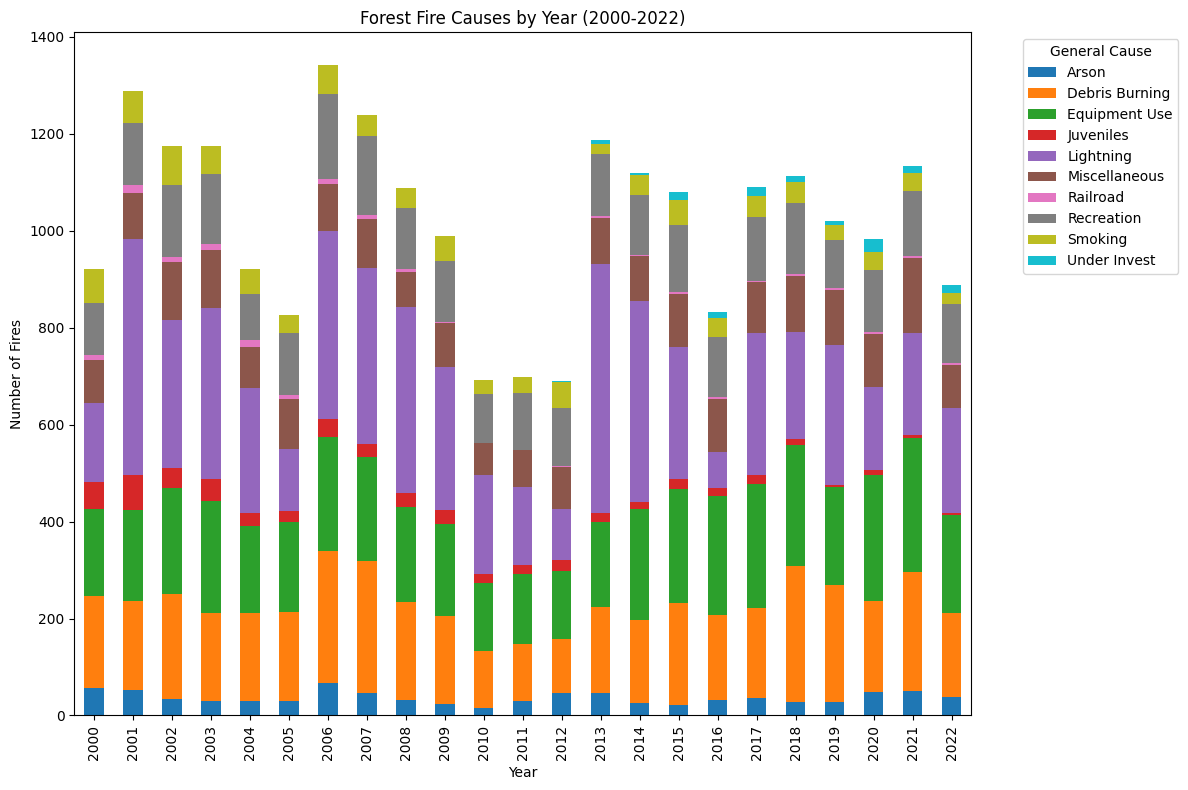

In [13]:
#bar chart attempt 1
fire_cause_by_year.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Forest Fire Causes by Year (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend(title='General Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


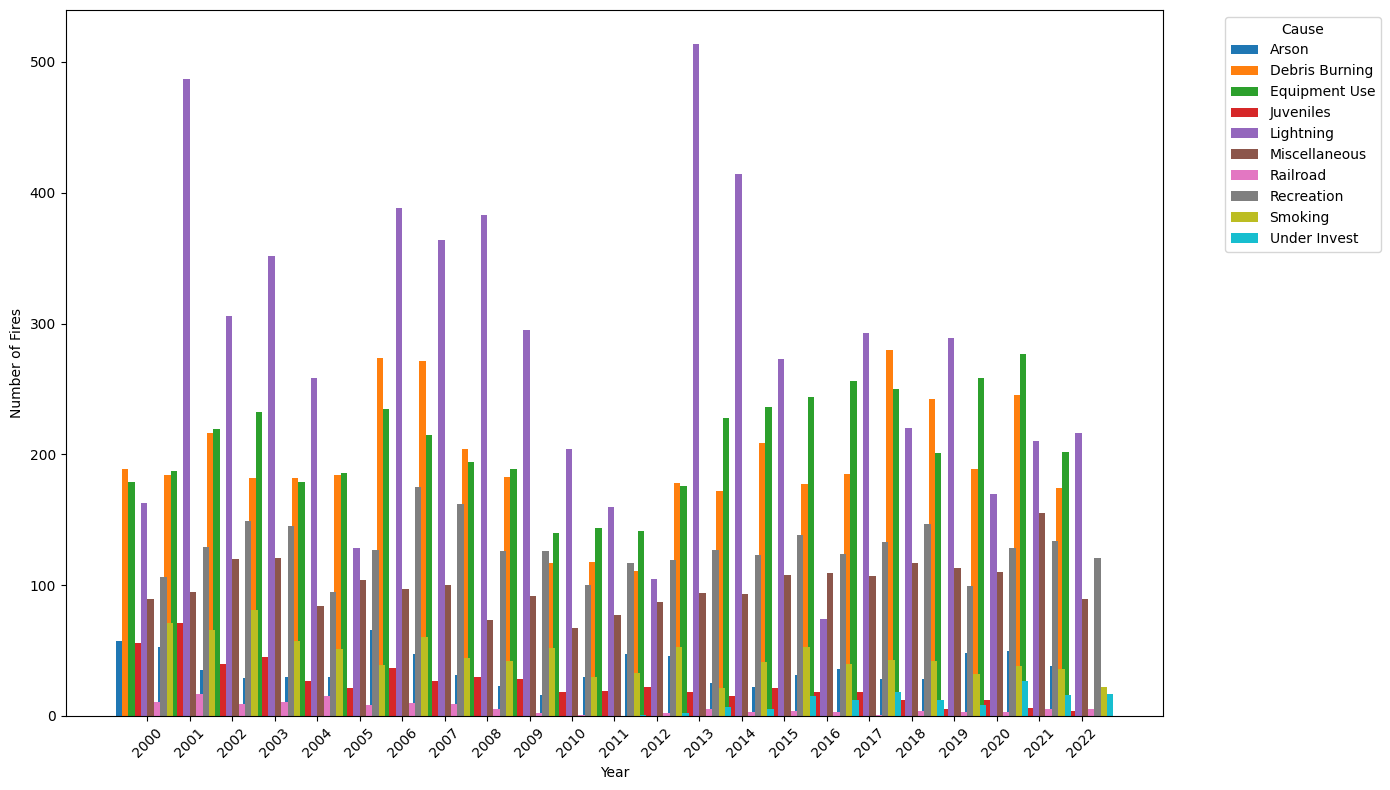

In [ ]:
#grouped bar chart might work better
years = fire_cause_by_year.index
causes = fire_cause_by_year.columns
bar_width = 0.15

#created array for individual causes
x_positions = [years + i * bar_width for i in range(len(causes))]

#plotting each cause as seperate bar
plt.figure(figsize=(14, 8))
for i, cause in enumerate(causes):
    plt.bar(x_positions[i], fire_cause_by_year[cause], width=bar_width, label=cause)

#lets try this againplt.title('Forest Fire Causes by Year (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.xticks(years + bar_width * (len(causes) - 1) / 2, years, rotation=45)  # Center x-ticks under clusters
plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

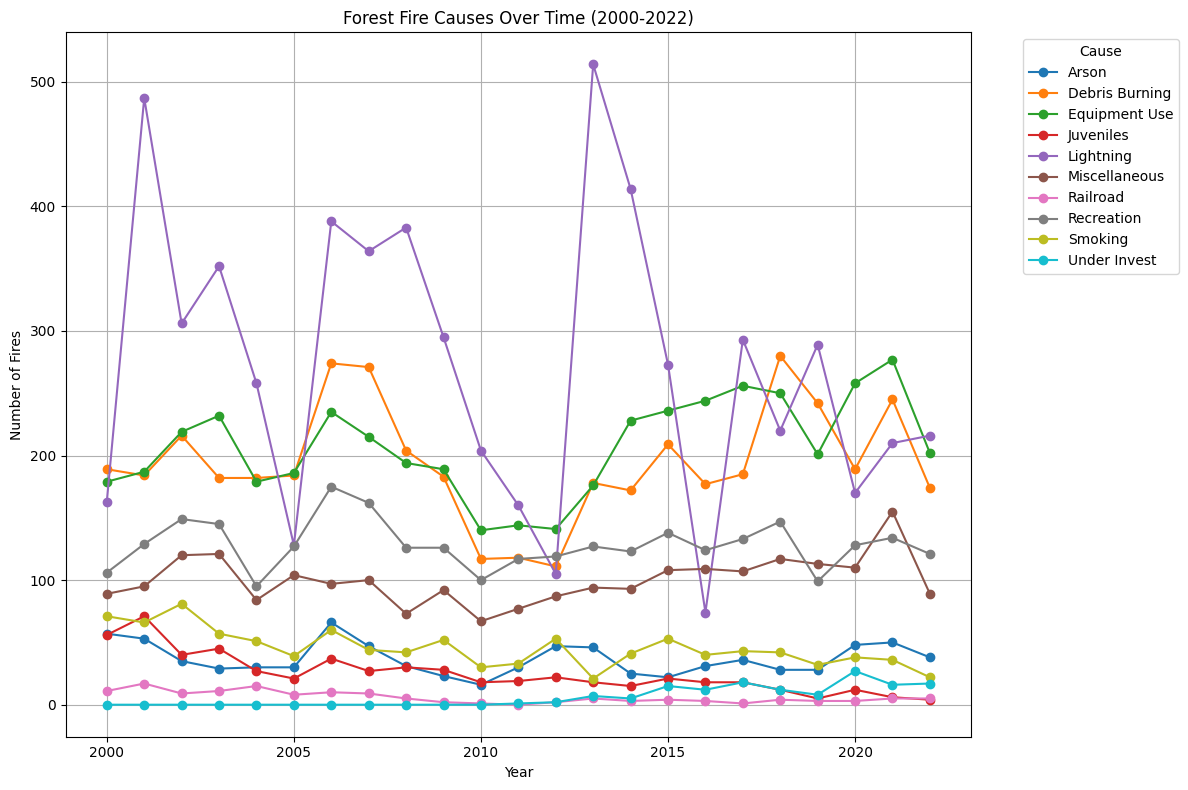

In [ ]:
#line plot attempt 2
total_counts = fire_cause_by_year.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))

for cause in fire_cause_by_year.columns:
    plt.plot(fire_cause_by_year.index, fire_cause_by_year[cause], marker='o', label=cause)
plt.title('Forest Fire Causes Over Time (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

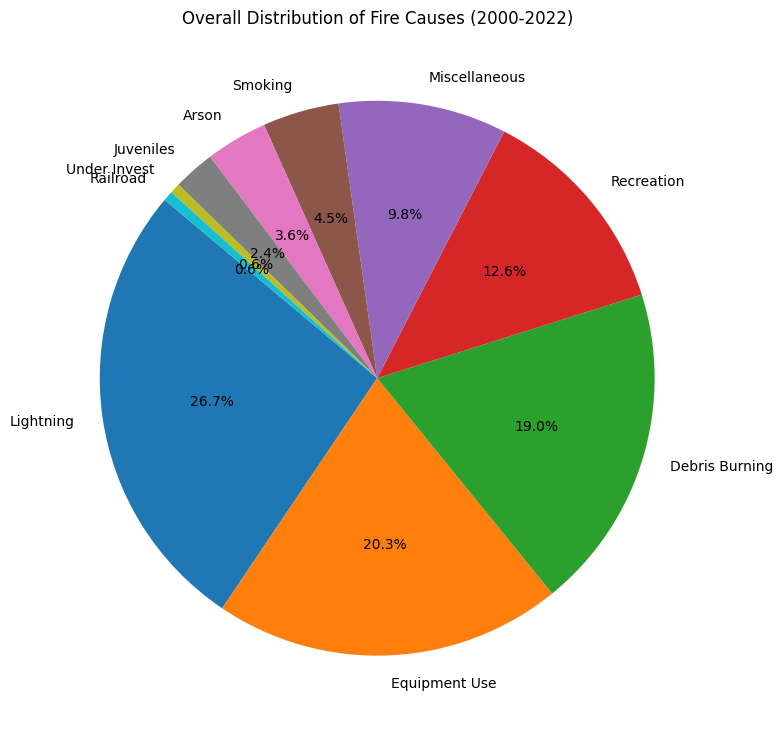

In [ ]:
#pie chart attempt 1
total_cause_counts = df['Cause'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(total_cause_counts, labels=total_cause_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall Distribution of Fire Causes (2000-2022)')
plt.tight_layout()
plt.show()